In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("C:\\Users\\amrut\\Downloads\\house_price.csv")
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [3]:
#Display basic info

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB
None


In [4]:
print(df.describe())

         total_sqft          bath         price           bhk  price_per_sqft
count  13200.000000  13200.000000  13200.000000  13200.000000    1.320000e+04
mean    1555.302783      2.691136    112.276178      2.800833    7.920337e+03
std     1237.323445      1.338915    149.175995      1.292843    1.067272e+05
min        1.000000      1.000000      8.000000      1.000000    2.670000e+02
25%     1100.000000      2.000000     50.000000      2.000000    4.267000e+03
50%     1275.000000      2.000000     71.850000      3.000000    5.438000e+03
75%     1672.000000      3.000000    120.000000      3.000000    7.317000e+03
max    52272.000000     40.000000   3600.000000     43.000000    1.200000e+07


In [5]:
# Missing values check
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64


In [ ]:
Finding and Handling Outliers

In [6]:
# Function to detect and handling outliers using Standard Deviation
df = pd.read_csv("C:\\Users\\amrut\\Downloads\\house_price.csv")
def detect_outliers_std(data, column, threshold=3):
    mean_value = data[column].mean()
    std_dev = data[column].std()
    
    lower_bound = mean_value - (threshold * std_dev)
    upper_bound = mean_value + (threshold * std_dev)
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    
    return outliers,lower_bound,upper_bound

# Select numerical columns for outlier detection
numerical_columns = ["price_per_sqft", "total_sqft", "bath", "price"]

# Detect outliers for each column
outlier_counts = {}
outlier_bounds = {}
for col in numerical_columns:
    outliers,lower,upper = detect_outliers_std(df, col)
    outlier_counts[col] = len(outliers)
    outlier_bounds[col] = (lower,upper)
    print(f"Outliers in {col}: {len(outliers)}")

# Print summary
print("\nOutlier counts per column:", outlier_bounds)
# Capping outliers at upper/lower bound
df_capped = df.copy()
for col in numerical_columns:
    lower, upper = outlier_bounds[col]
    df_capped[col] = np.where(df_capped[col] < lower, lower, df_capped[col])
    df_capped[col] = np.where(df_capped[col] > upper, upper, df_capped[col])

print("Dataset after capping:", df_capped.describe())
df


Outliers in price_per_sqft: 5
Outliers in total_sqft: 117
Outliers in bath: 240
Outliers in price: 192

Outlier counts per column: {'price_per_sqft': (-312261.1442419011, 328101.8177267496), 'total_sqft': (-2156.6675532499917, 5267.273119159083), 'bath': (-1.3256088968175663, 6.707881624090293), 'price': (-335.2518078827746, 559.8041631858049)}
Dataset after capping:          total_sqft          bath         price           bhk  price_per_sqft
count  13200.000000  13200.000000  13200.000000  13200.000000    13200.000000
mean    1519.570292      2.659537    106.184844      2.800833     6835.446522
std      795.808733      1.151904     99.376162      1.292843     7930.115195
min        1.000000      1.000000      8.000000      1.000000      267.000000
25%     1100.000000      2.000000     50.000000      2.000000     4267.000000
50%     1275.000000      2.000000     71.850000      3.000000     5438.000000
75%     1672.000000      3.000000    120.000000      3.000000     7317.000000
max   

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [15]:
# Function to detect outliers using percentile method (5th and 95th percentiles)

def detect_outliers_percentile(data, column, lower_percentile=5, upper_percentile=95):
    lower_bound = np.percentile(data[column], lower_percentile)
    upper_bound = np.percentile(data[column], upper_percentile)
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    
    return outliers, lower_bound, upper_bound

# Select numerical columns for outlier detection
numerical_columns = ["price_per_sqft", "total_sqft", "bath", "price"]

# Detect outliers
outlier_counts = {}
outlier_bounds = {}
for col in numerical_columns:
    outliers, lower, upper = detect_outliers_percentile(df, col)
    outlier_counts[col] = len(outliers)
    outlier_bounds[col] = (lower, upper)
    print(f"Outliers in {col}: {len(outliers)}")

print("\nOutlier bounds per column (5th-95th Percentile):", outlier_bounds)

# Capping outliers at the 5th and 95th percentile limits
df_capped = df.copy()
for col in numerical_columns:
    lower, upper = outlier_bounds[col]
    df_capped[col] = np.where(df_capped[col] < lower, lower, df_capped[col])
    df_capped[col] = np.where(df_capped[col] > upper, upper, df_capped[col])

print("Dataset after capping:", df_capped.describe())
df

Outliers in price_per_sqft: 1320
Outliers in total_sqft: 1320
Outliers in bath: 509
Outliers in price: 1315

Outlier bounds per column (5th-95th Percentile): {'price_per_sqft': (3107.8500000000004, 15312.099999999984), 'total_sqft': (671.95, 3216.549999999992), 'bath': (1.0, 5.0), 'price': (31.99, 320.0)}
Dataset after capping:          total_sqft          bath         price           bhk  price_per_sqft
count  13200.000000  13200.000000  13200.000000  13200.000000    13200.000000
mean    1478.028743      2.608106    100.025673      2.800833     6442.066742
std      626.929863      1.005016     75.659017      1.292843     3197.780056
min      671.950000      1.000000     31.990000      1.000000     3107.850000
25%     1100.000000      2.000000     50.000000      2.000000     4267.000000
50%     1275.000000      2.000000     71.850000      3.000000     5438.000000
75%     1672.000000      3.000000    120.000000      3.000000     7317.000000
max     3216.550000      5.000000    320.00000

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [7]:
# Function to detect outliers using Z-Score method
import numpy as np
from scipy import stats
def detect_outliers_zscore(data, column, threshold=3):
    z_scores = np.abs(stats.zscore(data[column]))  # Compute absolute Z-Scores
    outliers = data[z_scores > threshold]  # Identify outliers
    return outliers, z_scores

# Select numerical columns for outlier detection
numerical_columns = ["price_per_sqft", "total_sqft", "bath", "price"]

# Detect outliers for each column
outlier_counts = {}
zscore_values = {}
for col in numerical_columns:
    outliers, z_scores = detect_outliers_zscore(df, col)
    outlier_counts[col] = len(outliers)
    zscore_values[col] = z_scores
    print(f"Outliers in {col} (Z-Score > ±3): {len(outliers)}")

print("\nTotal Outlier Counts (Z-Score Method):", outlier_counts)

# Capping outliers at Z-Score threshold limits (mean ± 3*std)
df_capped = df.copy()
for col in numerical_columns:
    mean_value = df[col].mean()
    std_dev = df[col].std()
    lower_bound = mean_value - (3 * std_dev)
    upper_bound = mean_value + (3 * std_dev)
    
    df_capped[col] = np.where(df_capped[col] < lower_bound, lower_bound, df_capped[col])
    df_capped[col] = np.where(df_capped[col] > upper_bound, upper_bound, df_capped[col])

print("Dataset after capping:\n", df_capped.describe())


Outliers in price_per_sqft (Z-Score > ±3): 5
Outliers in total_sqft (Z-Score > ±3): 117
Outliers in bath (Z-Score > ±3): 240
Outliers in price (Z-Score > ±3): 192

Total Outlier Counts (Z-Score Method): {'price_per_sqft': 5, 'total_sqft': 117, 'bath': 240, 'price': 192}
Dataset after capping:
          total_sqft          bath         price           bhk  price_per_sqft
count  13200.000000  13200.000000  13200.000000  13200.000000    13200.000000
mean    1519.570292      2.659537    106.184844      2.800833     6835.446522
std      795.808733      1.151904     99.376162      1.292843     7930.115195
min        1.000000      1.000000      8.000000      1.000000      267.000000
25%     1100.000000      2.000000     50.000000      2.000000     4267.000000
50%     1275.000000      2.000000     71.850000      3.000000     5438.000000
75%     1672.000000      3.000000    120.000000      3.000000     7317.000000
max     5267.273119      6.707882    559.804163     43.000000   328101.817727


In [18]:
# Function to detect outliers using IQR method

def detect_outliers_iqr(data, column):
    Q1 = np.percentile(data[column], 25)  # 25th percentile (Q1)
    Q3 = np.percentile(data[column], 75)  # 75th percentile (Q3)
    IQR = Q3 - Q1  # Interquartile Range
    lower_bound = Q1 - 1.5 * IQR  # Lower bound
    upper_bound = Q3 + 1.5 * IQR  # Upper bound
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    
    return outliers, lower_bound, upper_bound

# Select numerical columns for outlier detection
numerical_columns = ["price_per_sqft", "total_sqft", "bath", "price"]

# Detect outliers
outlier_counts = {}
outlier_bounds = {}
for col in numerical_columns:
    outliers, lower, upper = detect_outliers_iqr(df, col)
    outlier_counts[col] = len(outliers)
    outlier_bounds[col] = (lower, upper)
    print(f"Outliers in {col}: {len(outliers)}")

print("\nOutlier bounds per column (IQR Method):", outlier_bounds)

# Capping outliers at IQR limits
df_capped = df.copy()
for col in numerical_columns:
    lower, upper = outlier_bounds[col]
    df_capped[col] = np.where(df_capped[col] < lower, lower, df_capped[col])
    df_capped[col] = np.where(df_capped[col] > upper, upper, df_capped[col])

print("Dataset after capping:\n", df_capped.describe())

Outliers in price_per_sqft: 1265
Outliers in total_sqft: 1149
Outliers in bath: 1030
Outliers in price: 1250

Outlier bounds per column (IQR Method): {'price_per_sqft': (-308.0, 11892.0), 'total_sqft': (242.0, 2530.0), 'bath': (0.5, 4.5), 'price': (-55.0, 225.0)}
Dataset after capping:
          total_sqft          bath         price           bhk  price_per_sqft
count  13200.000000  13200.000000  13200.000000  13200.000000    13200.000000
mean    1425.578094      2.569091     93.083261      2.800833     6181.215985
std      521.512229      0.917272     59.487164      1.292843     2631.064261
min      242.000000      1.000000      8.000000      1.000000      267.000000
25%     1100.000000      2.000000     50.000000      2.000000     4267.000000
50%     1275.000000      2.000000     71.850000      3.000000     5438.000000
75%     1672.000000      3.000000    120.000000      3.000000     7317.000000
max     2530.000000      4.500000    225.000000     43.000000    11892.000000


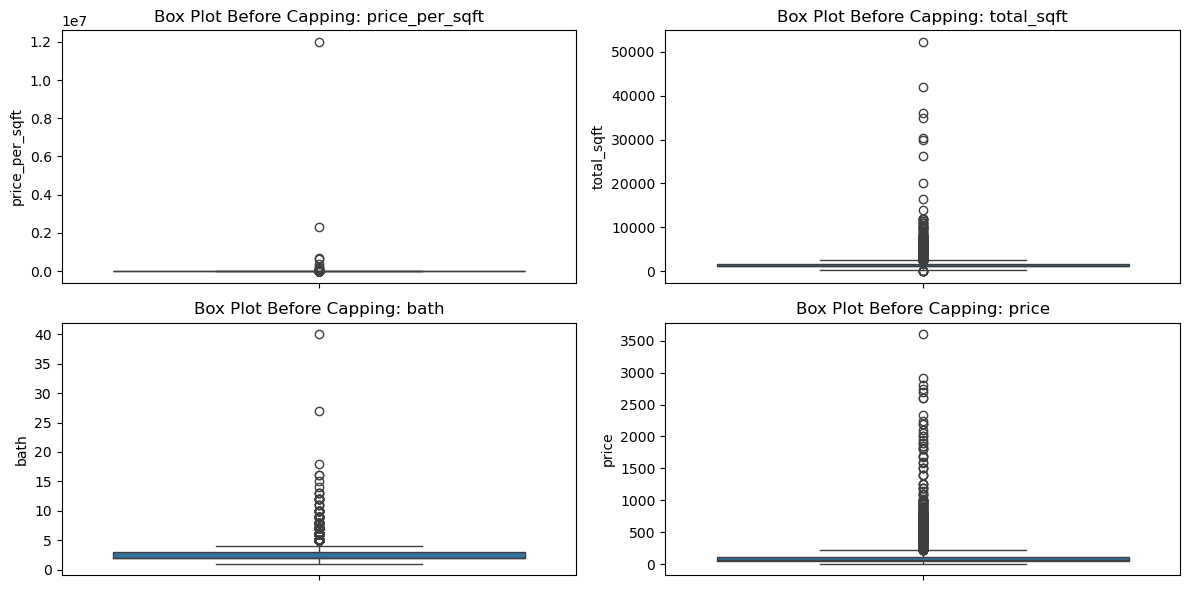

In [8]:
#3 Box plots - to confirm outlier treatment
import matplotlib.pyplot as plt
import seaborn as sns

# Plot box plots for each numerical column before outlier treatment
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col])
    plt.title(f"Box Plot Before Capping: {col}")

plt.tight_layout()
plt.show()

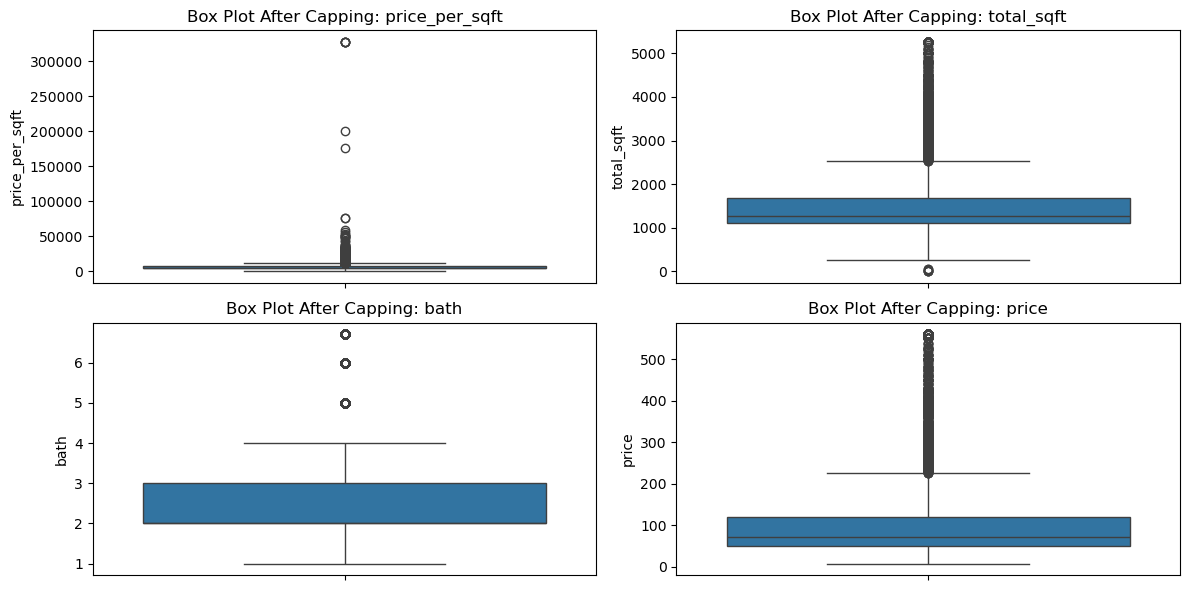

In [22]:
# Plot box plots for each numerical column after capping
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df_capped[col])
    plt.title(f"Box Plot After Capping: {col}")

plt.tight_layout()
plt.show()

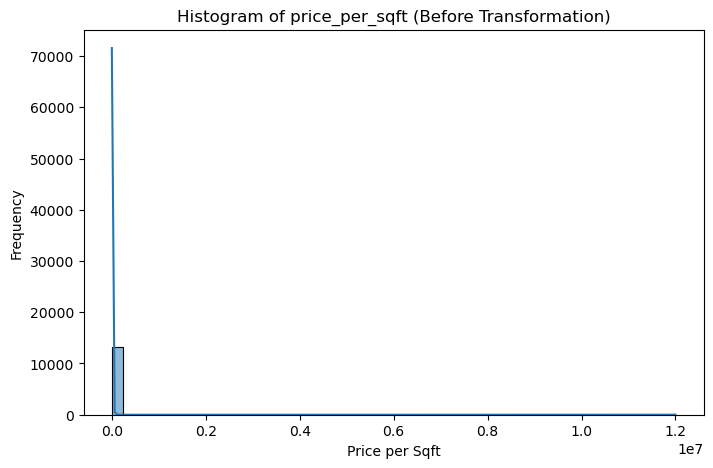

Skewness (Before): 108.27
Kurtosis (Before): 12090.63


In [9]:
#4.Histplot to check the normality of the column(price per sqft column) , calculate skewness and kurtosis
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# Plot histogram
plt.figure(figsize=(8, 5))
sns.histplot(df["price_per_sqft"], bins=50, kde=True)
plt.title("Histogram of price_per_sqft (Before Transformation)")
plt.xlabel("Price per Sqft")
plt.ylabel("Frequency")
plt.show()

# Calculate skewness and kurtosis
original_skewness = skew(df["price_per_sqft"])
original_kurtosis = kurtosis(df["price_per_sqft"])
print(f"Skewness (Before): {original_skewness:.2f}")
print(f"Kurtosis (Before): {original_kurtosis:.2f}")

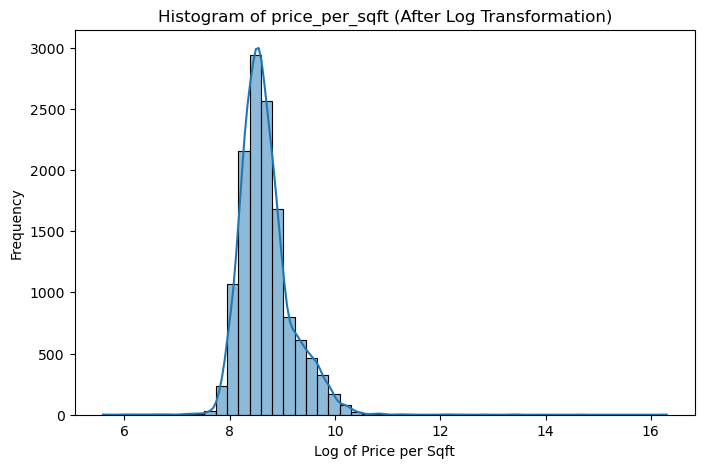

Skewness (After Log Transformation): 1.40
Kurtosis (After Log Transformation): 9.20


In [24]:
import numpy as np

# Apply log transformation
df["price_per_sqft_log"] = np.log1p(df["price_per_sqft"])

# Plot histogram after transformation
plt.figure(figsize=(8, 5))
sns.histplot(df["price_per_sqft_log"], bins=50, kde=True)
plt.title("Histogram of price_per_sqft (After Log Transformation)")
plt.xlabel("Log of Price per Sqft")
plt.ylabel("Frequency")
plt.show()

# Calculate skewness and kurtosis after transformation
log_skewness = skew(df["price_per_sqft_log"])
log_kurtosis = kurtosis(df["price_per_sqft_log"])
print(f"Skewness (After Log Transformation): {log_skewness:.2f}")
print(f"Kurtosis (After Log Transformation): {log_kurtosis:.2f}")

In [10]:
#5.correlation between all the numerical columns and plot heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation between numerical columns
numeric_df=df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()



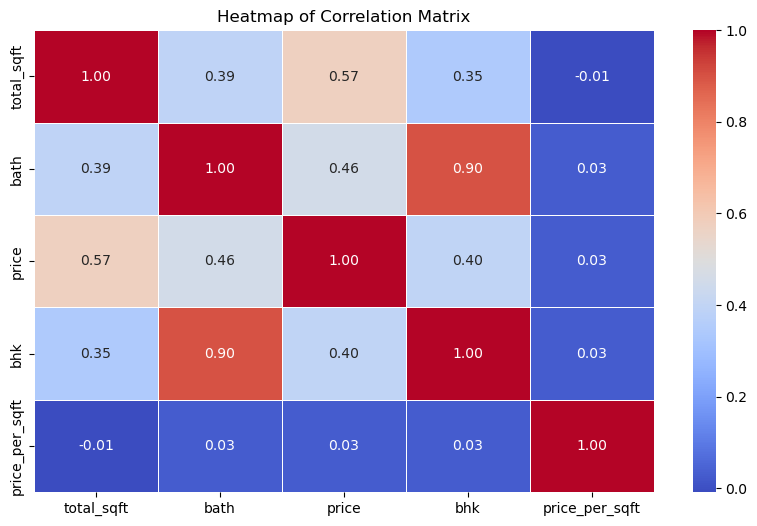

In [11]:
# Print correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Correlation Matrix")
plt.show()


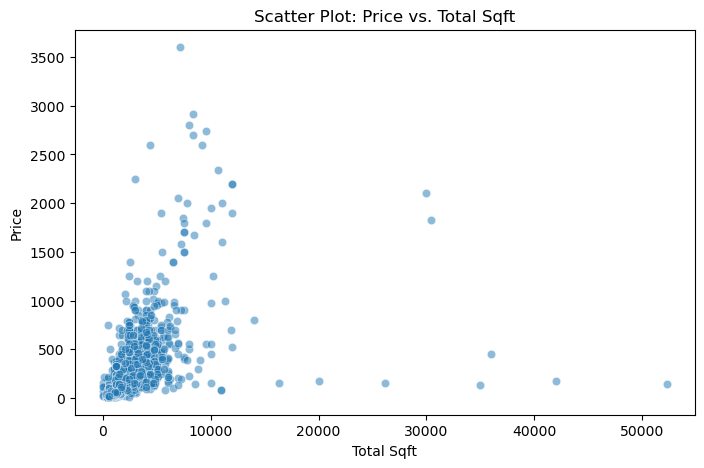

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["total_sqft"], y=df["price"], alpha=0.5)

# Labels and title
plt.xlabel("Total Sqft")
plt.ylabel("Price")
plt.title("Scatter Plot: Price vs. Total Sqft")
plt.show()

In [13]:
correlation_value = df["price"].corr(df["total_sqft"])

# Print correlation value
print(f"Correlation between Price and Total Sqft: {correlation_value:.2f}")

Correlation between Price and Total Sqft: 0.57
